In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

from PIL import Image, ImageChops, ImageStat

import skulls # refer to skulls.py

from IPython.display import display, Image as displayImage # awkward but avoids conflict

from matplotlib.pyplot import imshow
%matplotlib inline

# Skull Mosaics

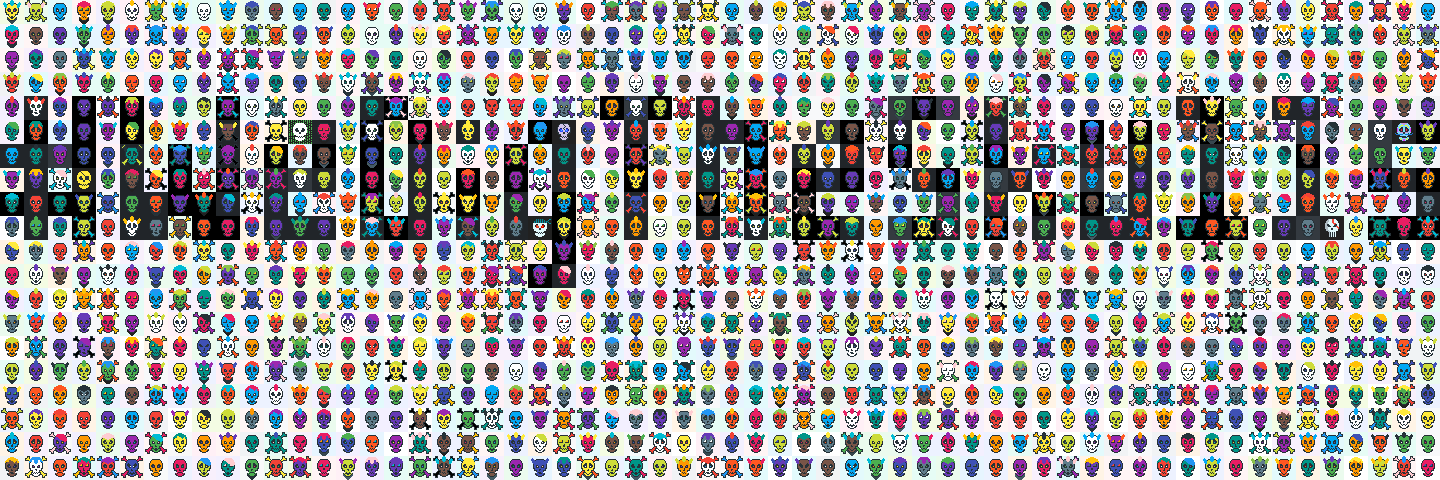

In [3]:
fn = skulls.create_file_mosaic('wdts_smaller.png')
displayImage(fn)

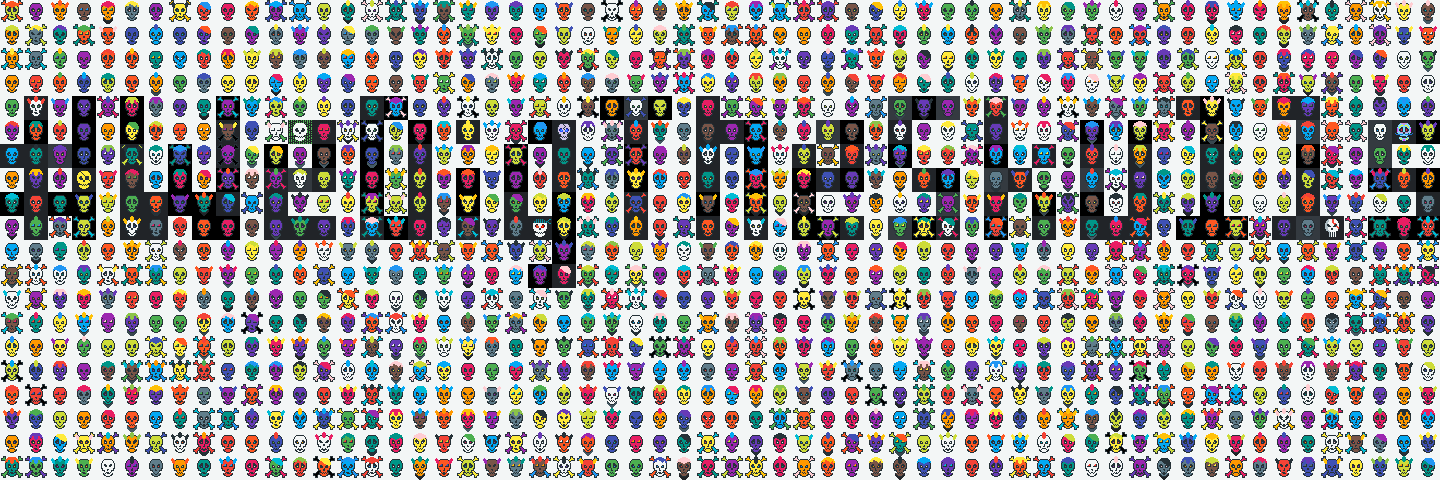

In [4]:
fn = skulls.create_file_mosaic('wdts_smaller.png', gif_mode=True)
displayImage(fn)

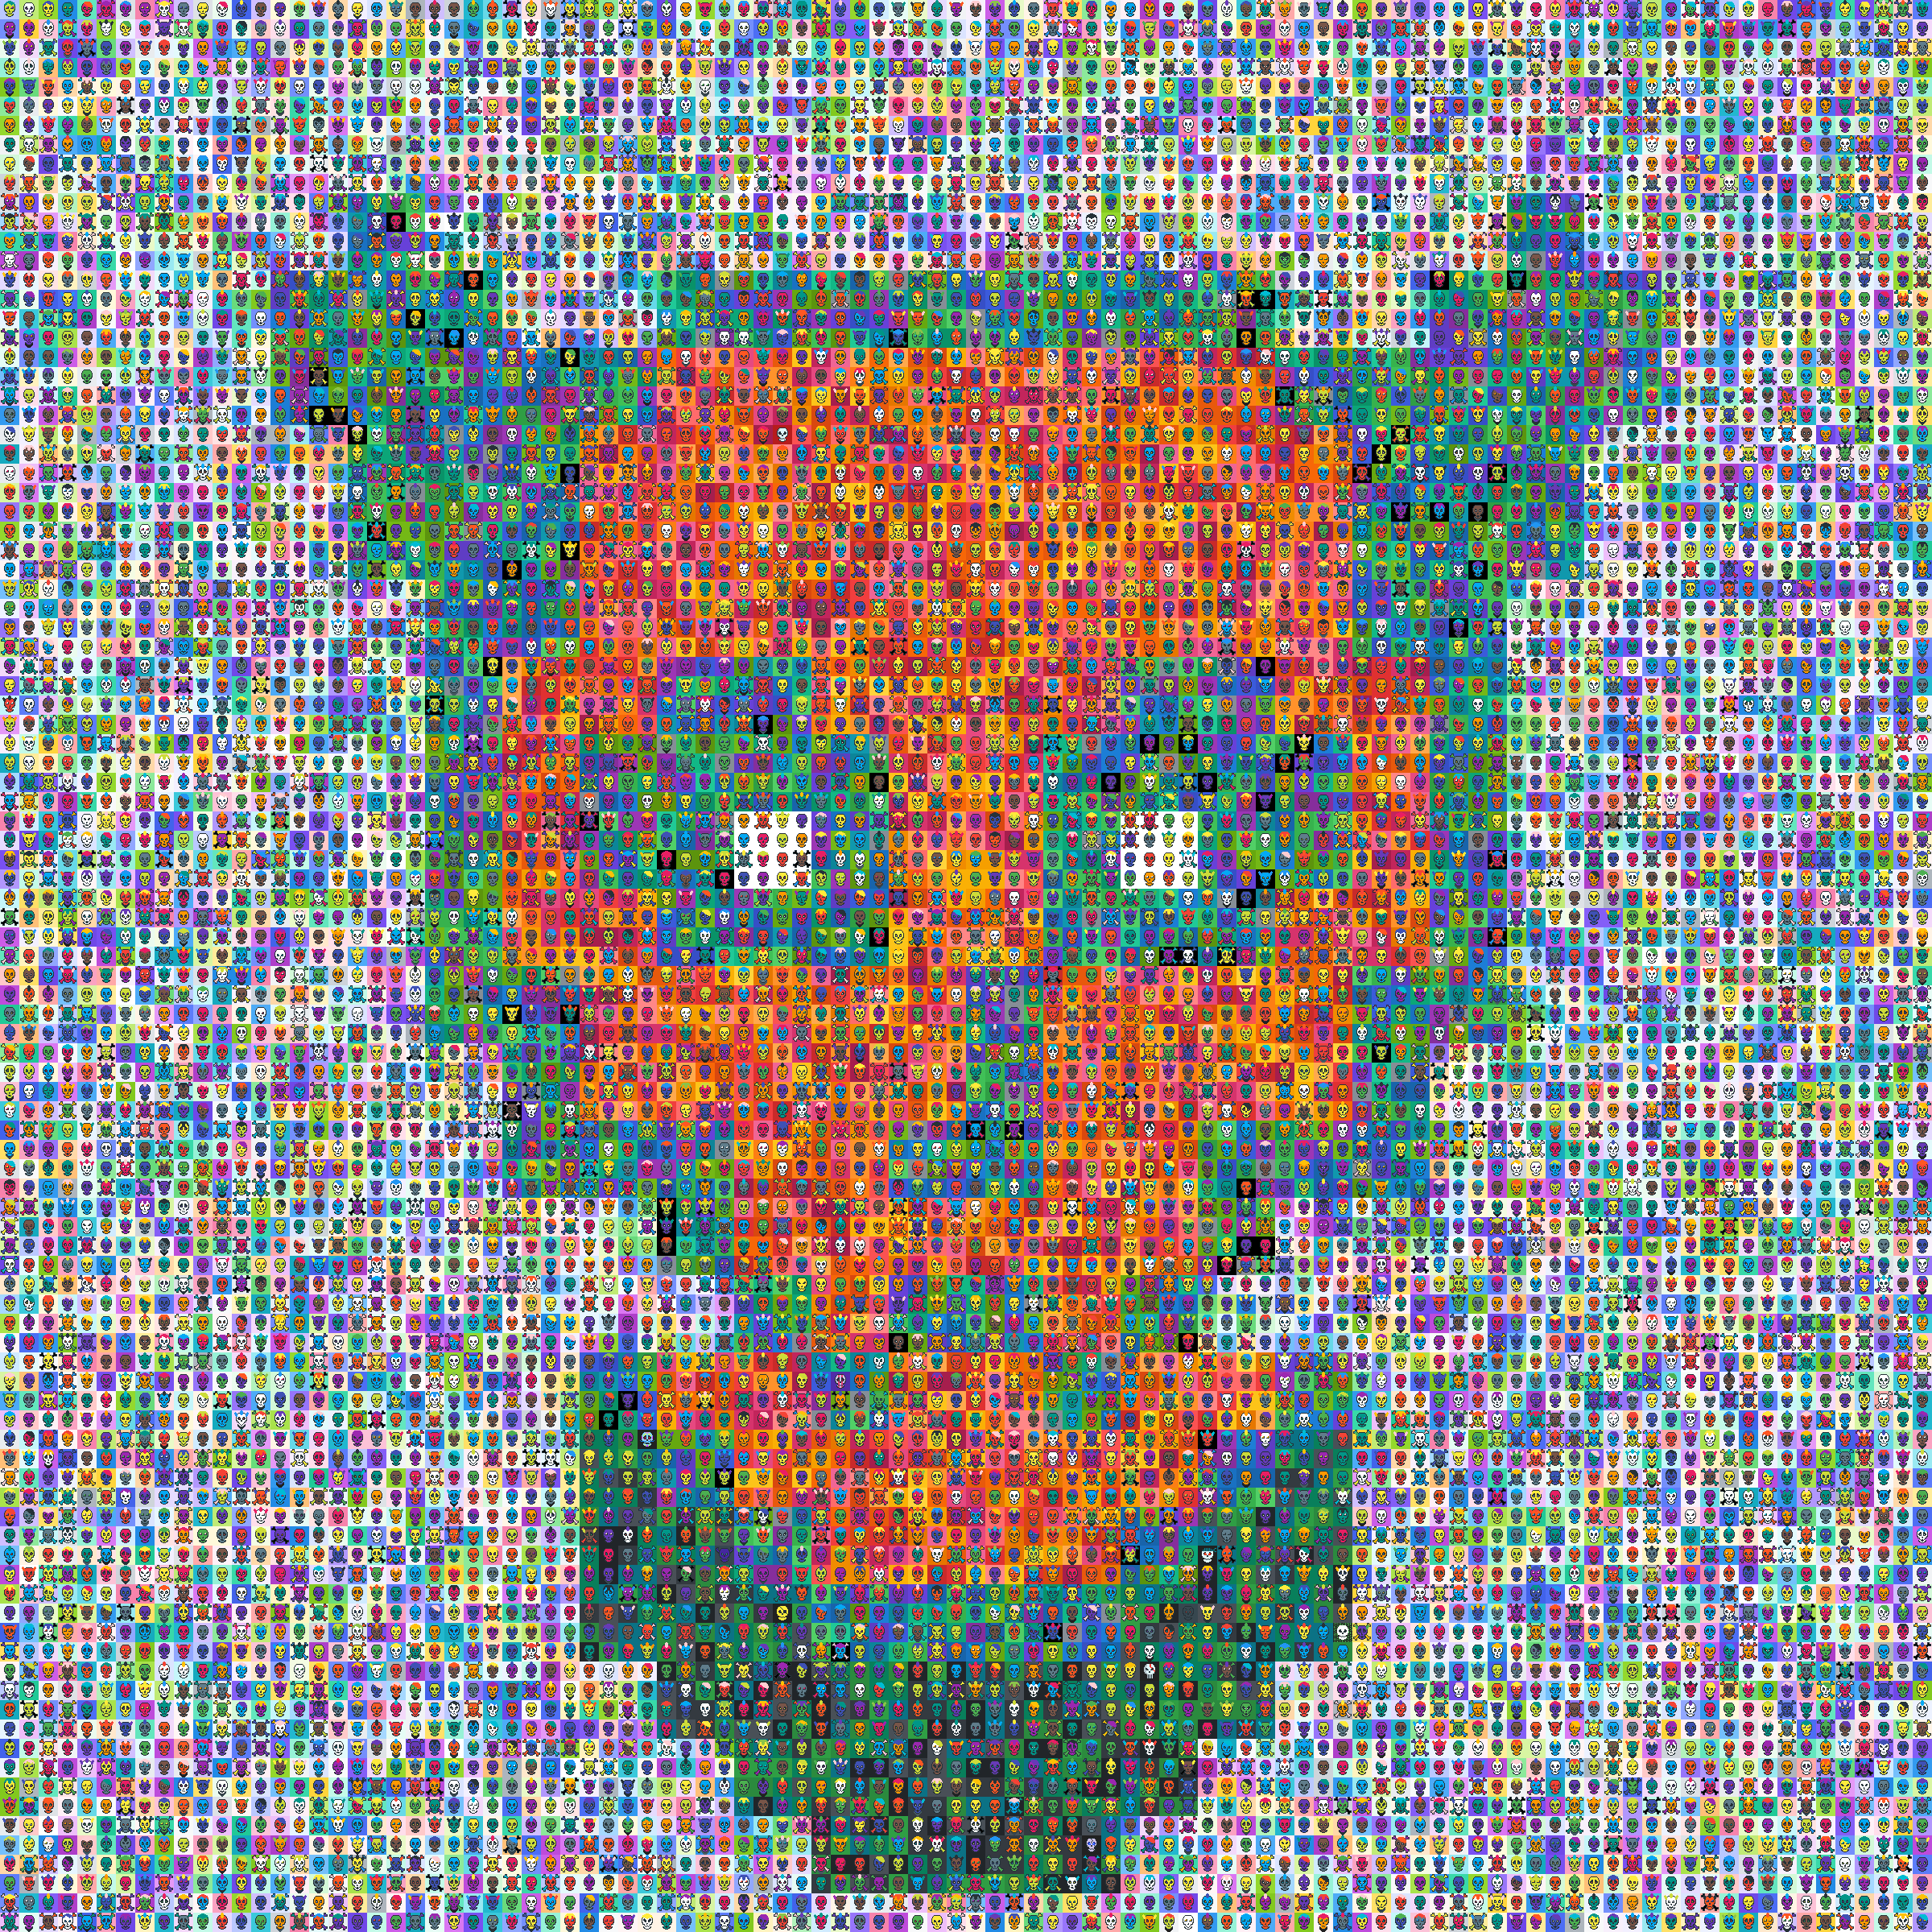

In [5]:
# create one
fn = skulls.create_skull_mosaic(7583)
displayImage(fn)

In [6]:
# create multiple
fns = skulls.create_skull_mosaic([3327, 2407])
fns

['cryptoskull mosaic #3327.png', 'cryptoskull mosaic #2407.png']

# Metadata
Metadata was previously extracted from cryptoskulls site and saved as a CSV file. Function to run a hard reload is available in skulls.py but (warning) it takes several minutes to run.

In [7]:
display(skulls.df_meta.shape)
display(skulls.df_meta.head())
display(skulls.df_meta.tail())

(10000, 12)

,UNIQUENESS INDEX,NAME,Background ID,Skull Gene,Hair Gene,Eyes Gene,Nose Gene,Teeth Gene,Bones Gene,Beard Gene,token_id,feature
0,26,Culmatrak,#15,#0,#122,#22,#2,#2,#15,#8,0,NaN
1,22,Hontaalthohr,#124,#0,#93,#45,#2,#5,#15,#8,1,NaN
2,22,Thosurdarm,#60,#10,#98,#9,#5,#0,#15,#8,2,NaN
3,12,Healnoul,#22,#5,#1,#73,#7,#1,#9,#8,3,NaN
4,22,Rauhri,#14,#8,#7,#88,#6,#5,#15,#8,4,NaN


,UNIQUENESS INDEX,NAME,Background ID,Skull Gene,Hair Gene,Eyes Gene,Nose Gene,Teeth Gene,Bones Gene,Beard Gene,token_id,feature
9995,11,Zixxoil,#29,#13,#111,#7,#6,#5,#15,#1,9995,NaN
9996,15,Thruuges,#129,#11,#122,#8,#7,#0,#15,#3,9996,NaN
9997,22,Xiantha,#89,#12,#43,#68,#3,#0,#15,#8,9997,NaN
9998,11,Yarkiustrux,#101,#3,#32,#45,#0,#0,#15,#3,9998,NaN
9999,12,Ghiulrealah,#131,#0,#89,#47,#6,#10,#10,#8,9999,NaN


UNIQUENESS INDEX            11
NAME                Inthaulfek
Background ID             #105
Skull Gene                 #11
Hair Gene                  #48
Eyes Gene                  #44
Nose Gene                   #2
Teeth Gene                  #7
Bones Gene                 #15
Beard Gene                  #5
token_id                  7583
feature                    NaN
Name: 7583, dtype: object

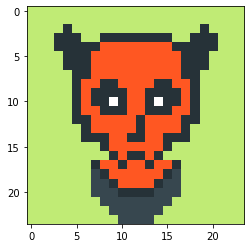

In [8]:
skull_id = 7583
imshow(skulls.cropped_skulls[skull_id])
skulls.df_meta.iloc[skull_id]

# Validating Assembly Method
This assembles 9990 skulls (ignores the 10 1/1's) using the broken-out original components then compares each pixel to the original hard copies from cryptoskulls to ensure an exact match.

In [9]:
%%time
skulls.validate()

success
Wall time: 21.3 s


# Assembling a skull using different image sets

In [10]:
skull_id = 7583

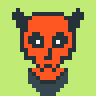

In [11]:
# original copy from cryptoskulls
skulls.cropped_skulls[skull_id].resize((96, 96), Image.NEAREST)

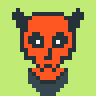

In [12]:
# assembled using original components (should be the same as orignal above)
skulls.assemble(skull_id, 'cryptoskulls_24', 24, 96)

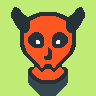

In [13]:
# assembled using new components
skulls.assemble(skull_id, 'cryptoskulls_96', 96)